In [1]:
import numpy as np
import matplotlib.pyplot as plt

X =  [[1.03491257]
 [1.63141805]
 [0.62844294]
 [1.30573197]
 [0.6144545 ]]
y =  [[5.81431655]
 [8.9865839 ]
 [6.13882299]
 [9.25984832]
 [5.03785658]]


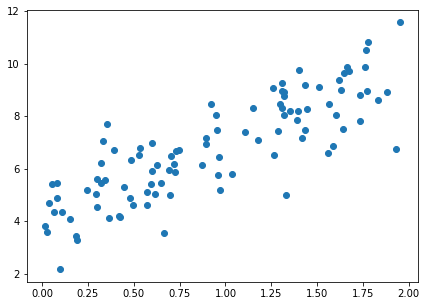

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("X = ", X[:5])
print("y = ", y[:5])

plt.figure(figsize=(7, 5))
plt.scatter(X, y)

## Интерполяция?

**Интерполяция** — способ выбрать из семейства функций ту, которая проходит через заданные точки. Часто функцию затем используют для вычисления в промежуточных точках. Например, мы вручную задаем цвет нескольким точкам и хотим чтобы цвета остальных точек образовали плавные переходы между заданными. Или задаем ключевые кадры анимации и хотим плавные переходы между ними. Классические примеры: интерполяция полиномами Лагранжа, сплайн-интерполяция, многомерная интерполяция (билинейная, трилинейная, методом ближайшего соседа и т.д). Есть также родственное понятие экстраполяции — предсказание поведения функции вне интервала. Например, предсказание курса доллара на основании предыдущих колебаний — экстраполяция.  
![](https://habrastorage.org/r/w1560/webt/qg/pu/yw/qgpuyw14gedgfx2naxzd7wvhiw4.png)

## Аппроксимация?

**Аппроксимация** — способ выбрать из семейства «простых» функций приближение для «сложной» функции на отрезке, *при этом ошибка не должна превышать определенного предела*. Аппроксимацию используют, когда нужно получить функцию, похожую на данную, но более удобную для вычислений и манипуляций (дифференцирования, интегрирования и т.п). При оптимизации критических участков кода часто используют аппроксимацию: если значение функции вычисляется много раз в секунду и не нужна абсолютная точность, то можно обойтись более простым аппроксимантом с меньшей «ценой» вычисления. Классические примеры включают ряд Тейлора на отрезке, аппроксимацию ортогональными многочленами, аппроксимацию Паде, аппроксимацию синуса Бхаскара и т.п.  
![](https://habrastorage.org/r/w1560/webt/p-/k5/mi/p-k5mikdujjfdsmwpbsvphmkd4c.png)

## Регрессия?

**Регрессия** — способ выбрать из семейства функций ту, которая *минимизирует функцию потерь*. Последняя характеризует, насколько сильно пробная функция отклоняется от значений в заданных точках. Если точки получены в эксперименте, они неизбежно содержат ошибку измерений, шум, поэтому разумнее требовать, чтобы функция передавала общую тенденцию, а не точно проходила через все точки. В каком-то смысле регрессия — это *«интерполирующая аппроксимация»*: мы хотим провести кривую как можно ближе к точкам и при этом сохранить ее максимально простой чтобы уловить общую тенденцию. За баланс между этими противоречивыми желаниями как-раз отвечает функция потерь (в английской литературе «loss function» или «cost function»).  
![](https://habrastorage.org/r/w1560/webt/mj/gl/d6/mjgld6nvylinet9ud1irmsahjq4.png)

## Линейная регрессия
![](https://editor.analyticsvidhya.com/uploads/72060linear.png)  
Линейная регрессия вырабатывает прогноз, просто вычисляя сумму входных признаков и добавляя к ней константу под названием *член смещения* (*bias term*), которая также называется **свободным членом**
$$ y_{pred_i} = b_{0_{pred}} + b_{1_{pred}}X_i $$
* $y_{pred_i}$ - зависимая переменная (цель)
* $X_i$ - $i$-тое значение предиктора (вектора признаков)
* $b_{0_{pred}}$ - пересечение (константа)
* $b_{1_{pred}}$ - наклон для X

![](https://habrastorage.org/r/w1560/webt/vh/dt/b1/vhdtb1elxvvw8coyhhharuklwtw.png)

**Функция издержек**
$$ RSS = \sum_{i=1}^{n} (y_i - y_{pred_i})^2 = \sum_{i=1}^{n} (y_i - b_{0_{pred}} - b_{1_{pred}}X_i)^2 $$

**Среднеквадратичное отклонение ($MSE$)**:
$$ MSE = {1 \over n} \sum_{i=1}^{n} (y_i - y_{pred_i})^2 $$
* $b_{0_{pred}}, b_{1_{pred}}$ - значения, которые минимизирует RSS

$$ b_{1_{pred}} = {\sum_{i=1}^{n}(y_i - \bar y)(X_i - \bar X) \over \sum_{i=1}^{n}(X_i - \bar X)^2 } $$

$$ b_{0_{pred}} = \bar y - b_{1_{pred}}X $$

# Решаем

In [3]:
def estimate_coefficients(x, y):
  mean_x, mean_y = np.mean(x), np.mean(y)

  numerator = np.sum((y - mean_y) * (x - mean_x))
  denominator = np.sum((x - mean_x)**2)

  b_1 = numerator / denominator
  b_0 = mean_y - b_1*mean_x

  return (b_0, b_1)

In [4]:
def cacl_rss(y, y_predict):
  error = y - y_predict
  rss = np.sum(error ** 2)
  return rss


def calc_mse(x, rss):
  return rss/len(x)

In [7]:
def plot_regression_line(x, y, y_pred):
  plt.figure(figsize=(10, 7))
  plt.scatter(x, y)
  rss = cacl_rss(y, y_pred)
  print(f"RSS = {rss}")
  mse = calc_mse(x, rss)
  print(f"MSE = {mse}")
  plt.plot(x, y_pred, 'g')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.show()

b_0_pred = 4.140243097370162, b_1_pred = 2.8403165692004038
RSS = 113.69962729615314
MSE = 1.1369962729615315


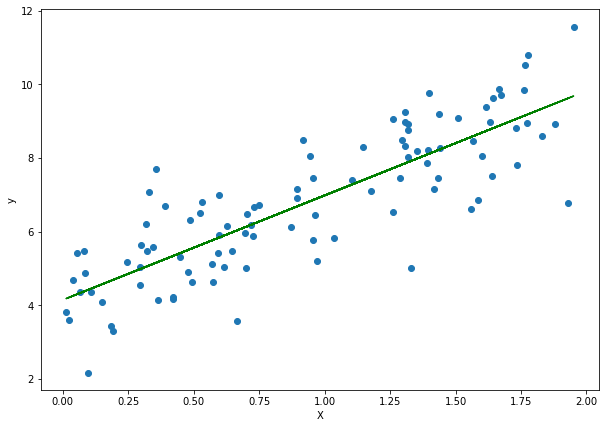

In [15]:
b = estimate_coefficients(X, y)
print(f"b_0_pred = {b[0]}, b_1_pred = {b[1]}")

y_pred = b[0] + b[1]*X

plot_regression_line(X, y, y_pred)

In [36]:
df = pd.DataFrame(list(zip(y.flatten(), y_pred.flatten())), columns=['y', 'y_pred'])
df

,y,y_pred
0,5.814317,7.079722
1,8.986584,8.773987
2,6.138823,5.925220
3,9.259848,7.848935
4,5.037857,5.885488
...,...,...
95,5.198079,6.901151
96,3.604032,4.207935
97,7.504384,8.794074
98,6.443199,6.875988


In [39]:
np.mean((df['y'] - df['y_pred'])**2)

1.1369962729615315

# Множественная линейная регрессия
$$ y_{pred} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... +\theta_nx_n $$
* $ y_{pred} $ - спрогнозированное значение
* $ n $ - кол-во признаков
* $ x_i $ - значение $i$-того признака
* $ \theta_j $ - $ j $-тый параметр модели ($x_0$ всегда должен быть равен 1)  

**Нормальное уравнение (*Normal Equation*)** - решение задачи в аналитическом виде (*closed-form solution*):
$$ \theta_{pr} = (X^TX)^{-1}X^Ty $$
* $ \theta_{pr} $ - значение $\theta$, которое сводит к минимуму функцию издержек
* $ y $ - вектор целевых значений, содержащий от $ y_1 $ до $ y_n $ 

In [42]:
X_ = np.c_[np.ones((100, 1)), X]  # добавляет x0 = 1 к каждому образцу
print(X_[:5])
theta_best = np.linalg.inv(X_.T.dot(X_))\
              .dot(X_.T)\
              .dot(y)
theta_best

[[1.         1.03491257]
 [1.         1.63141805]
 [1.         0.62844294]
 [1.         1.30573197]
 [1.         0.6144545 ]]


array([[4.1402431 ],
       [2.84031657]])

In [43]:
y_predict = X_.dot(theta_best)
y_predict[:5]

array([[7.07972241],
       [8.77398681],
       [5.92522   ],
       [7.84893525],
       [5.8854884 ]])

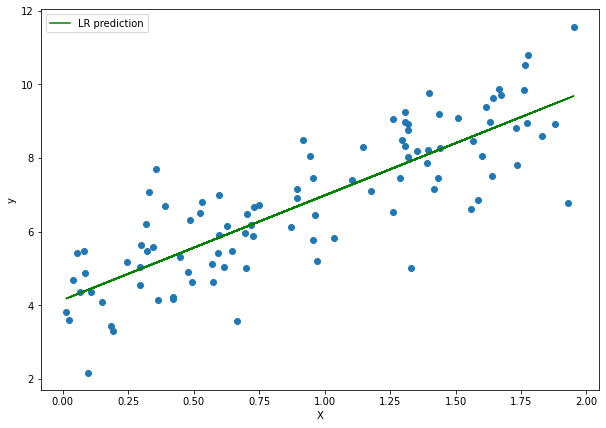

In [44]:
plt.figure(figsize=(10, 7))
plt.scatter(X, y)
plt.plot(X, y_predict, "g", label="LR prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

In [45]:
error = y - y_predict
se = np.sum(error ** 2)
mse = se/len(X)
print("mean squared error is", mse)

mean squared error is 1.1369962729615317


## Та же линейная регрессия встроенным средствами Scikit-Learn

In [47]:
from sklearn.linear_model import LinearRegression

In [59]:
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print('Вес признаков: ', model.coef_)
print("Член смещения: ", model.intercept_)

Вес признаков:  [[2.84031657]]
Член смещения:  [4.1402431]


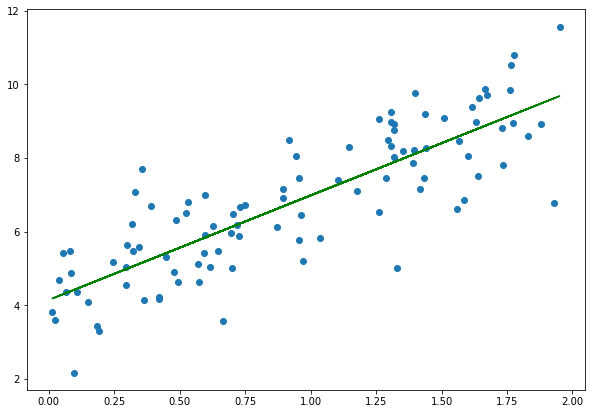

In [60]:
plt.figure(figsize=(10, 7))
plt.scatter(X, y)
plt.plot(X, y_pred, "g")

Множественная регрессия с LinearRegression()

In [61]:
X_new = 2 * np.random.rand(100, 3)
y_new = 4 + 3 * X_new + np.random.randn(100, 3)

print("X_new = ", X_new[:5])
print("y_new = ", y_new[:5])

model.fit(X_new, y_new)
print('Вес признаков: ', model.coef_)
print("Член смещения: ", model.intercept_)

X_new =  [[1.37995766 1.36822648 1.17466354]
 [1.11349115 0.12062141 1.71737369]
 [1.40106237 0.09946242 1.71106356]
 [1.14376767 0.39381385 1.28971866]
 [1.21989937 1.85579201 0.71780311]]
y_new =  [[8.44295105 9.73142053 6.67169976]
 [5.98134058 4.21964316 9.91569212]
 [9.67961699 3.26995508 9.79057291]
 [8.4939823  5.73937185 9.17805178]
 [7.65084137 7.50910269 7.32303483]]
Вес признаков:  [[ 3.08247491 -0.23647518 -0.0282712 ]
 [ 0.15820842  2.94661141  0.00856285]
 [ 0.11146803 -0.15110976  3.22668775]]
Член смещения:  [4.22878679 3.96861573 3.84893135]


In [71]:
y_predict_new = model.predict(X_new)
y_predict_new[:5]

array([[8.12571089, 8.22862689, 7.58627261],
       [7.58401914, 4.51490944, 9.49625161],
       [8.47563216, 4.49800426, 9.51114311],
       [7.62483283, 5.32102947, 8.07843516],
       [7.52995409, 9.63605843, 6.02060934]])

Как посчитать среднеквадратичную ошибку?

In [72]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_new, y_predict_new)

0.9059222412728895

## Коммерческий пример: предсказание продаж по рекламе на ТВ, радио и в газетах

In [ ]:
import pandas as pd


data = pd.read_csv('drive/MyDrive/АБД/Задания/2. Линейная регрессия/data/advertising.csv', index_col=0)
print(data.shape)
data.head()

(200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


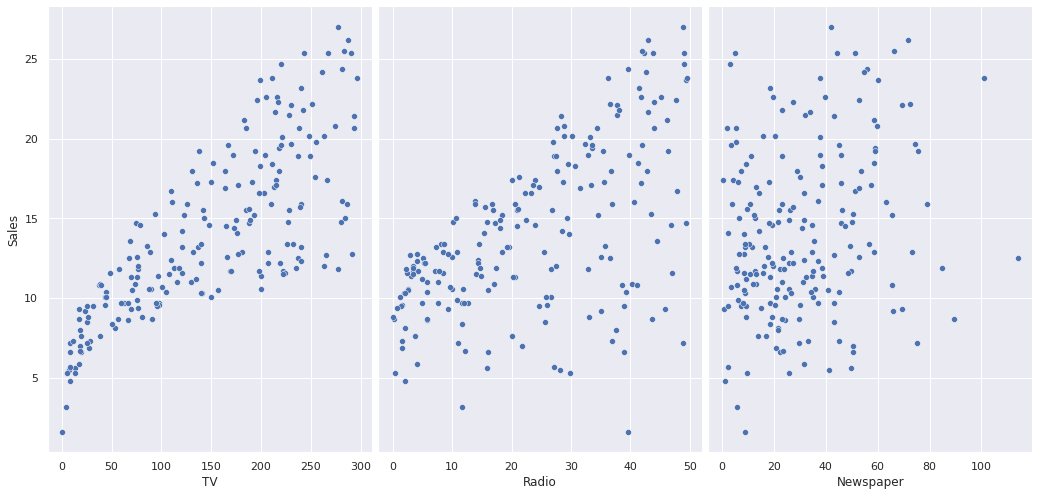

In [ ]:
import seaborn as sns; sns.set()

sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7)

In [ ]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

lm2 = LinearRegression()
lm2.fit(X, y)

print(lm2.intercept_)
print(lm2.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [ ]:
X_new = pd.DataFrame({'TV': [50], 'Radio': [20], 'Newspaper': [30]})
lm2.predict(X_new)

array([8.96659719])

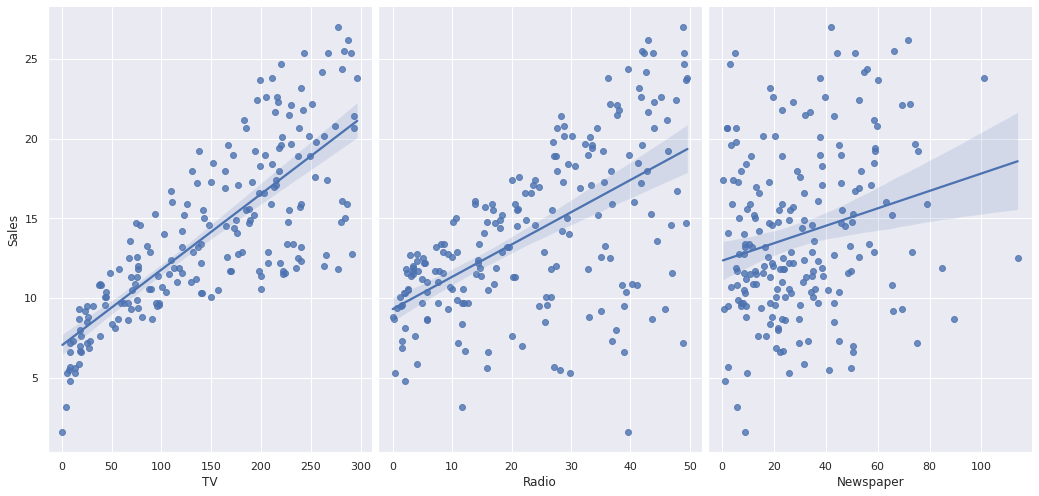

In [ ]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

# Домашнее задание
---
Провести линейную регрессию на датасете по посетителям сайта 3 способами (с визуализацией):
* по формулам
* через нормальное уравнение
* с помощью ```sklearn.linear_model.LinearRegression```
* сравнить время выполнения